# Quick Functionality Guide - Incidence Statistics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (16, 5)
import sys
sys.path.append('../core/')
import data_download as dd
import data_plot as dp
import data_parser as parse

The `data_download.verify_update()` function takes care of downloading and maintaining AGES and ECDC data. No unnecessary downloads, and always up-to-date.

In [2]:
dd.verify_update("AGES")


Data provided by AGES.
Database already exists locally. Checking for update...

Downloading...
/home/nick/PycharmProjects/Paean/paeon/data/austria/data.zip
Database successfully downloaded.

Successfully unzipped and installed database.


Data is wrangled by `data_parser`, which can be edited to include specific regions of interest.

In [3]:
dataset = parse.setup_datasets()

Use `state_seven_day_incidence()` to examine 7-day incidence per 100,000 people on a state level. If no states are specified, certain states/districts are shown by default:

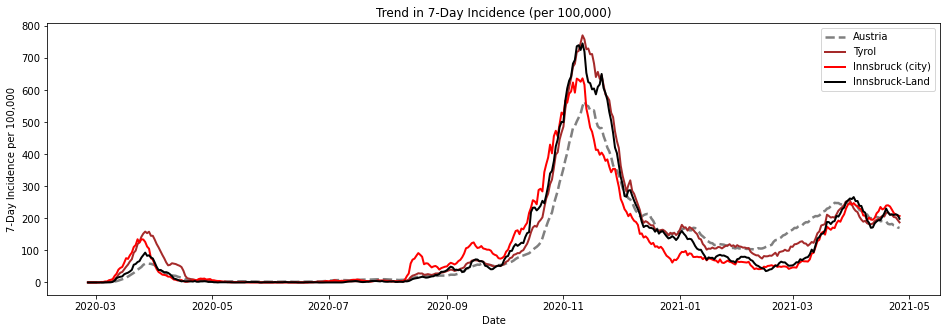

In [4]:
dp.state_seven_day_incidence(dataset)

This can be overridden using the _`state_list`_ argument, which accepts English/German names and state ID. Add individual districts by calling `district_seven_day_incidence()`, using the district's name **in German** or GKZ number. Use arguments to call national level data, set time intervals, and line colours.

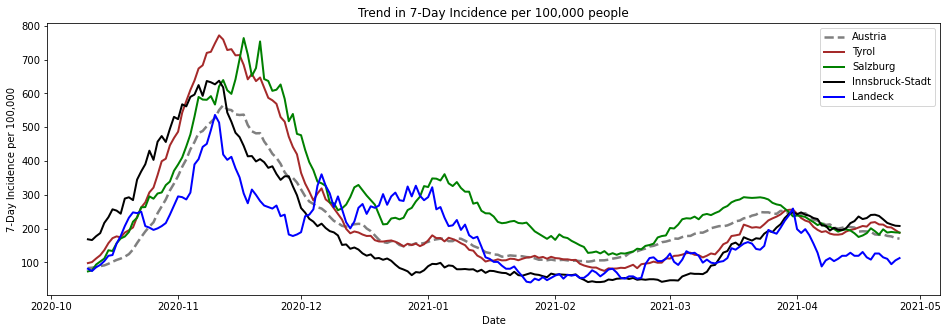

In [5]:
dp.district_seven_day_incidence(dataset,"Austria", time_start=-200, background="yes")
dp.state_seven_day_incidence(dataset, state_list=["Tirol", 5], time_start=-200)
dp.district_seven_day_incidence(dataset, "Innsbruck-Stadt", time_start=-200, line_color="black")
dp.district_seven_day_incidence(dataset, 706, time_start=-200, line_color="blue")

Too many lines and too many colours make for rainbow spaghetti, but there is clear lag time in case spikes between districts for November, as well as significant variations in rates of decline over the winter.

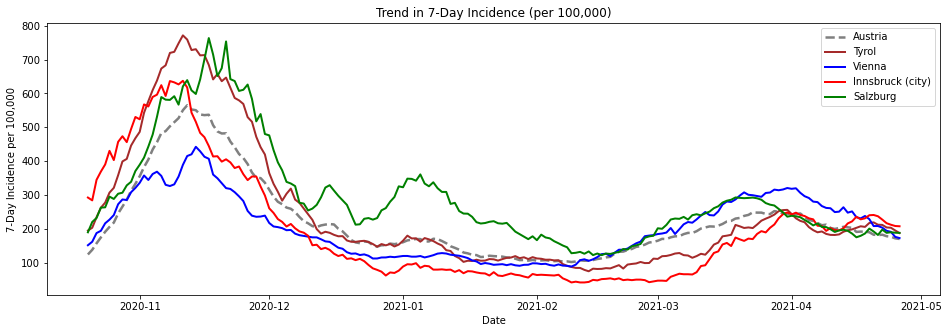

In [6]:
dp.state_seven_day_incidence(
    dataset,
    state_list=["austria", "tirol", "vienna", "innsbruck-stadt", "salzburg"],
    time_start=-190,
)

Different measures in different cities appear to affect how quickly the 7-day incidence rate decreases.

There are various other metrics, but at the moment these are only available for certain states. Additionally, AGES only provides data from March 2020 at the state level.

Metrics include ICU hospitalisations per 100,000 people:

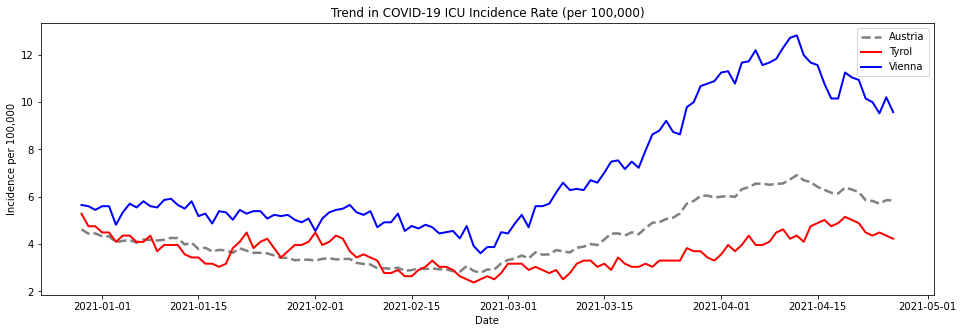

In [7]:
dp.plot_icu_incidence(dataset, -120)

The percentage of ICU stations (only) allocated to COVID-19 patients that are occupied:

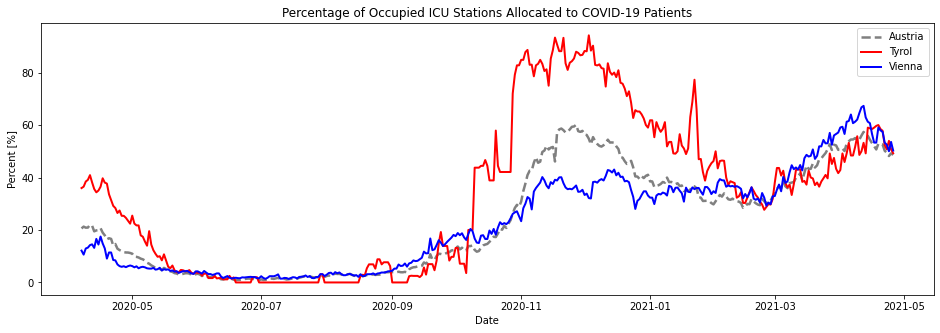

In [8]:
dp.plot_icu_percentages(dataset, 6)

Spikes in this metric seem to coincide with 7-day incidence rates exceeding 100 per 100,000 people.

And finally, some rainbow spaghetti:

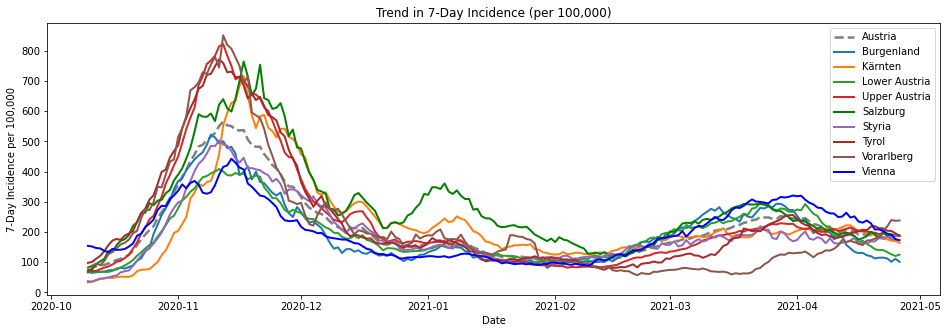

In [9]:
dp.state_seven_day_incidence(dataset, state_list=[10,1,2,3,4,5,6,7,8,9],time_start=-200)

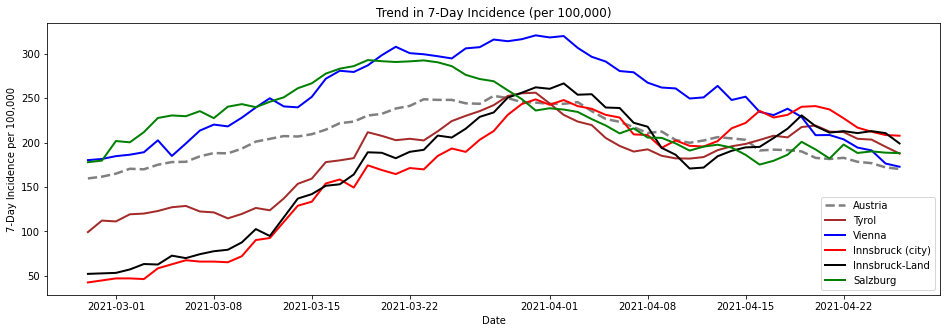

In [10]:
dp.state_seven_day_incidence(
    dataset,
    state_list=["austria", "tirol", "vienna", "innsbruck-stadt", "innsbruck-land","salzburg"],
    time_start=-60,
)